In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Exploratory Data Analysis (EDA):

In [3]:
train_df = pd.read_csv("C:/Users/disha/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv")
test_df = pd.read_csv("C:/Users/disha/Downloads/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv")

print(train_df.head())
print(test_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
cat_cols=train_df.select_dtypes(include=['object']).columns
num_cols= train_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


cat_cols=test_df.select_dtypes(include=['object']).columns
num_cols= test_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables:
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [5]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Histograms

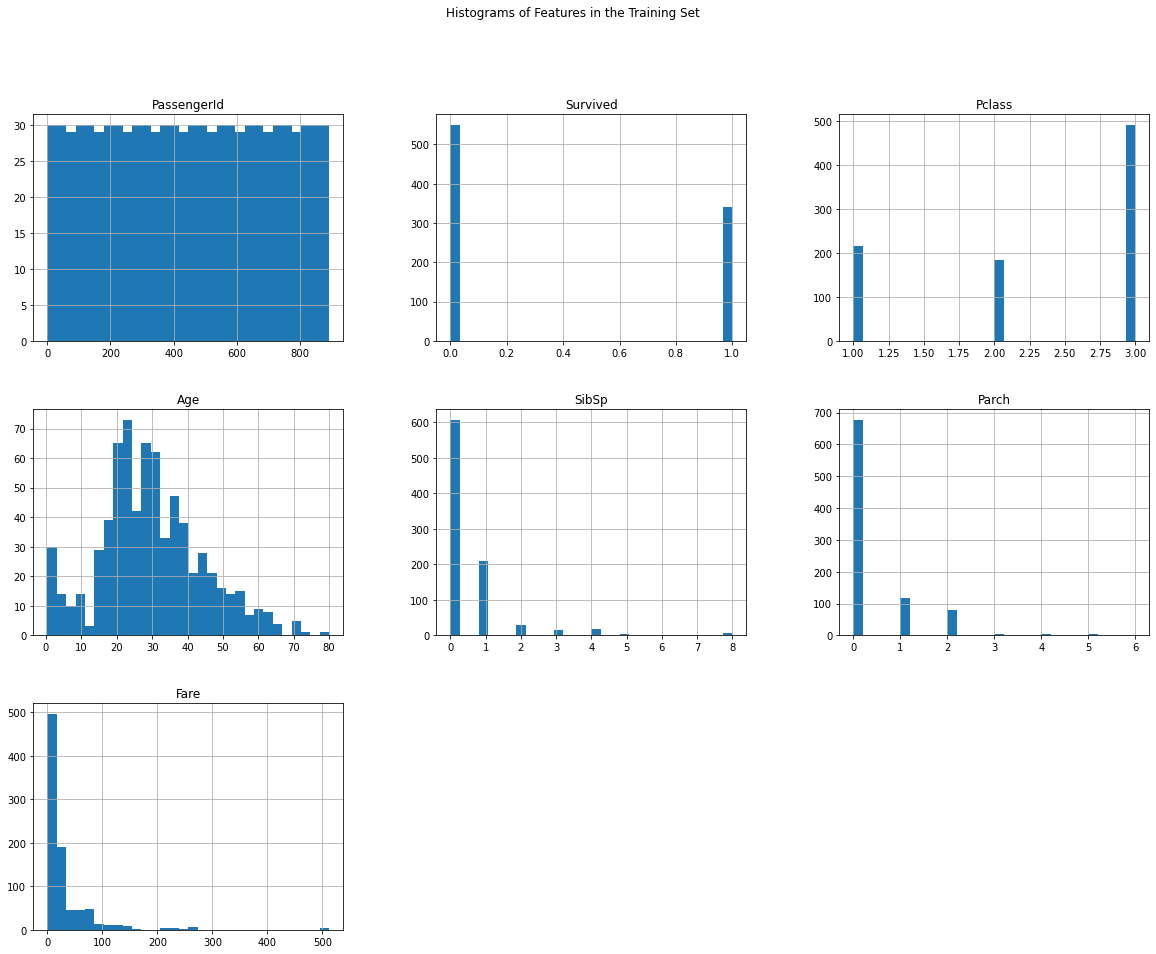

In [6]:
train_df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Features in the Training Set")
plt.show()

# Box plots

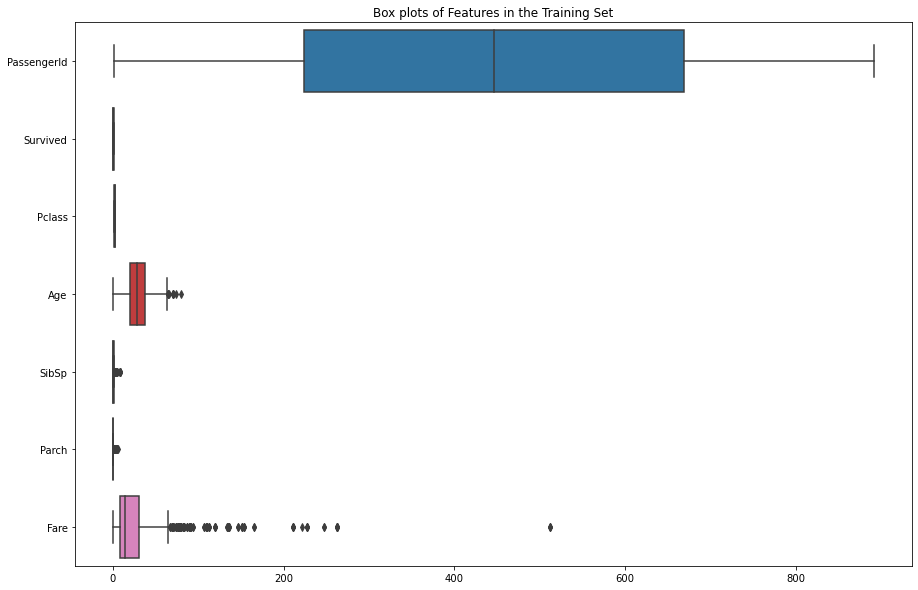

In [7]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df, orient="h")
plt.title("Box plots of Features in the Training Set")
plt.show()

# Scatter plot

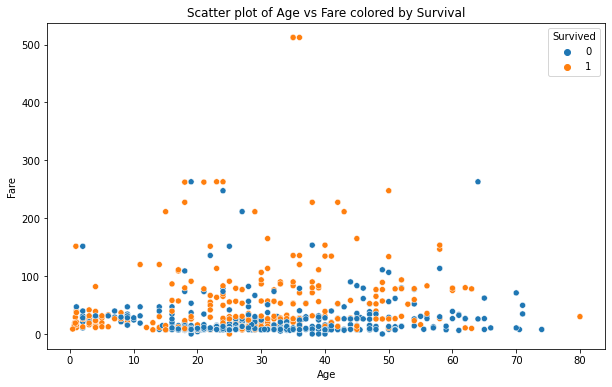

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived')
plt.title("Scatter plot of Age vs Fare colored by Survival")
plt.show()


# Bar plot

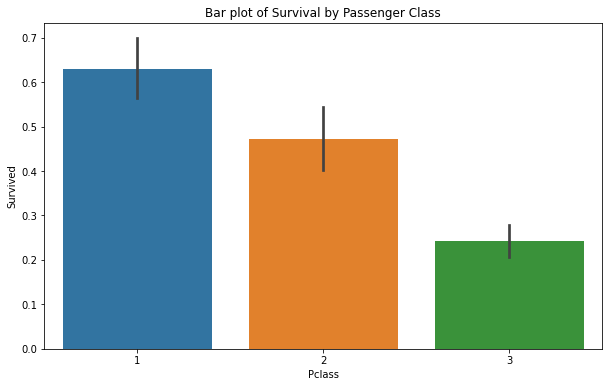

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Bar plot of Survival by Passenger Class")
plt.show()

# Impute missing values

In [10]:
imputer = SimpleImputer(strategy='median')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
train_df['Cabin'] = train_df['Cabin'].fillna(train_df['Cabin'].mode()[0])
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

test_df['Age'] = imputer.transform(test_df[['Age']])
test_df['Fare'] = imputer.transform(test_df[['Fare']])
test_df['Cabin'] = test_df['Cabin'].fillna(test_df['Cabin'].mode()[0])

print(train_df.isnull().sum())
print(test_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Encode categorical variables

In [11]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)
print(train_df.head())
print(test_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare    Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500  B96 B98         1           0           1  
1          PC 17599  71.2833      C85         0           0           0  
2  STON/O2. 3101282   7.9250  B96 B98         0           0           1  
3            113803  53.1000  

In [12]:
X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


(712, 9) (179, 9) (712,) (179,)


In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Building Predictive Models:

In [52]:
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)


xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)


# Evaluation metrics for LightGBM

In [48]:
lgb_accuracy = accuracy_score(y_val, y_pred_lgb)
lgb_precision = precision_score(y_val, y_pred_lgb)
lgb_recall = recall_score(y_val, y_pred_lgb)
lgb_f1 = f1_score(y_val, y_pred_lgb)
print(f"LightGBM - Accuracy: {lgb_accuracy},  Precision: {lgb_precision},   Recall: {lgb_recall},    F1-Score: {lgb_f1}")


LightGBM - Accuracy: 0.7988826815642458,  Precision: 0.7794117647058824,   Recall: 0.7162162162162162,    F1-Score: 0.7464788732394366


# Evaluation metrics for XGBoost

In [ ]:

xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
xgb_precision = precision_score(y_val, y_pred_xgb)
xgb_recall = recall_score(y_val, y_pred_xgb)
xgb_f1 = f1_score(y_val, y_pred_xgb)
print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-Score: {xgb_f1}")

# Hyperparameter tuning for LightGBM

In [27]:
lgb_params = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42,verbose=-1), lgb_params, cv=5, scoring='accuracy')
lgb_grid.fit(X_train, y_train)
best_lgb_model = lgb_grid.best_estimator_


# Hyperparameter tuning for XGBoost

In [ ]:
# Hyperparameter tuning for XGBoost
xgb_params = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

# Best model evaluation metrics for LightGBM

In [28]:
best_y_pred_lgb = best_lgb_model.predict(X_val)
best_lgb_accuracy = accuracy_score(y_val, best_y_pred_lgb)
best_lgb_precision = precision_score(y_val, best_y_pred_lgb)
best_lgb_recall = recall_score(y_val, best_y_pred_lgb)
best_lgb_f1 = f1_score(y_val, best_y_pred_lgb)

print(f"LightGBM - Accuracy: {best_lgb_accuracy}, Precision: {best_lgb_precision}, Recall: {best_lgb_recall}, F1-Score: {best_lgb_f1}")


LightGBM - Accuracy: 0.8100558659217877, Precision: 0.7857142857142857, Recall: 0.7432432432432432, F1-Score: 0.7638888888888888
XGBoost - Accuracy: 0.8100558659217877, Precision: 0.8125, Recall: 0.7027027027027027, F1-Score: 0.7536231884057971


# Best model evaluation metrics for XGBoost

In [47]:
best_y_pred_xgb = best_xgb_model.predict(X_val)
best_xgb_accuracy = accuracy_score(y_val, best_y_pred_xgb)
best_xgb_precision = precision_score(y_val, best_y_pred_xgb)
best_xgb_recall = recall_score(y_val, best_y_pred_xgb)
best_xgb_f1 = f1_score(y_val, best_y_pred_xgb)

print(f"XGBoost - Accuracy: {best_xgb_accuracy}, Precision: {best_xgb_precision}, Recall: {best_xgb_recall}, F1-Score: {best_xgb_f1}")


XGBoost - Accuracy: 0.8100558659217877, Precision: 0.8125, Recall: 0.7027027027027027, F1-Score: 0.7536231884057971


# Visualize the comparison

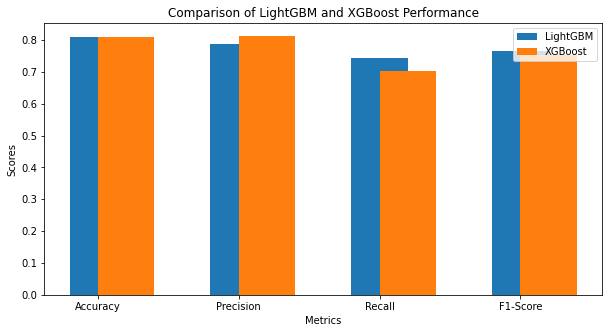

In [29]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lgb_scores = [best_lgb_accuracy, best_lgb_precision, best_lgb_recall, best_lgb_f1]
xgb_scores = [best_xgb_accuracy, best_xgb_precision, best_xgb_recall, best_xgb_f1]

x = range(len(metrics))
plt.figure(figsize=(10, 5))
plt.bar(x, lgb_scores, width=0.4, label='LightGBM', align='center')
plt.bar(x, xgb_scores, width=0.4, label='XGBoost', align='edge')
plt.xticks(x, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.legend()
plt.show()



# Results:

Conducted Exploratory Data Analysis (EDA), preprocessing, model training, hyperparameter tuning, and evaluation to identify the strengths and weaknesses of each algorithm.

Both models perform equally well in terms of accuracy.
XGBoost is slightly better at precision, implying fewer false positives.
LightGBM excels in recall, suggesting fewer false negatives.
The overall F1-Score is slightly higher for LightGBM, indicating a better balance between precision and recall.

LightGBM would be the better choice 